In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate

In [2]:
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
paletteFessa = [
    '#1F3B73', # dark-blue
    '#2F9294', # green-blue
    '#50B28D', # green
    '#A7D655', # pisello
    '#FFE03E', # yellow
    '#FFA955', # orange
    '#F4173B', #'#D6573B', # red
]

paletteCaCO3 = [
    '#A7D655',
    '#909090',
    '#F4173B',
    '#1F3B73',
]

In [4]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.5, 3*2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

# Calculate

In [5]:
binNumber=300

## SCAN-ML

In [6]:
numSim=4
Nignore=1000
fes_all=np.zeros([numSim,binNumber])
fes_all_renorm=np.zeros([numSim,binNumber])
for i in range(numSim):
    colvar=np.genfromtxt("iter-77/molecular-dynamics/production/caco3-batches/" + str(i+1) + "/COLVAR")
    cv=colvar[Nignore:,1]
    time=colvar[Nignore:,0]
    bias=colvar[Nignore:,2]+colvar[Nignore:,7]
    kb=0.00831446261
    temp=330
    beta=1/(kb*temp)
    logweights=beta*bias
    logweights -= np.amax(logweights)
    histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,1.0),bins=binNumber)
    ctr_bins=(bins[1:]+bins[:-1])/2
    factor=4*np.pi*np.power(ctr_bins,2)
    fes=-(1/beta)*np.log(histo)
    fes -= np.amin(fes)
    fes_renorm = -(1/beta)*np.log(histo/factor)
    condition=np.logical_and(ctr_bins>0.6,ctr_bins<0.9)
    #baseline=np.mean(fes_renorm[condition])
    #fes_renorm -= baseline
    fes_renorm -= np.amin(fes_renorm)
    fes_all[i,:] = fes
    fes_all_renorm[i,:] = fes_renorm

/tmp/ipykernel_4122028/3948826598.py:18: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_4122028/3948826598.py:20: RuntimeWarning: divide by zero encountered in log
  fes_renorm = -(1/beta)*np.log(histo/factor)


In [7]:
numSim=4
Nignore=1000
fes_all_large=np.zeros([numSim,binNumber])
fes_all_renorm_large=np.zeros([numSim,binNumber])
for i in range(numSim):
    colvar=np.genfromtxt("iter-77/molecular-dynamics/production/caco3-batches-large/" + str(i+1) + "/COLVAR")
    cv=colvar[Nignore:,1]
    time=colvar[Nignore:,0]
    bias=colvar[Nignore:,2]+colvar[Nignore:,7]
    kb=0.00831446261
    temp=330
    beta=1/(kb*temp)
    logweights=beta*bias
    logweights -= np.amax(logweights)
    histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,2.0),bins=binNumber)
    ctr_bins_large=(bins[1:]+bins[:-1])/2
    factor=4*np.pi*np.power(ctr_bins_large,2)
    fes=-(1/beta)*np.log(histo)
    fes -= np.amin(fes)
    fes_renorm = -(1/beta)*np.log(histo/factor)
    #condition=np.logical_and(ctr_bins_large>0.8,ctr_bins_large<1.4)
    #baseline=np.mean(fes_renorm[condition])
    #fes_renorm -= baseline
    fes_renorm -= np.amin(fes_renorm)
    fes_all_large[i,:] = fes
    fes_all_renorm_large[i,:] = fes_renorm

/tmp/ipykernel_4122028/582235162.py:18: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_4122028/582235162.py:20: RuntimeWarning: divide by zero encountered in log
  fes_renorm = -(1/beta)*np.log(histo/factor)


In [8]:
numSim=4
Nignore=1000
fes_all_xlarge=np.zeros([numSim,binNumber])
fes_all_renorm_xlarge=np.zeros([numSim,binNumber])
for i in range(numSim):
    colvar=np.genfromtxt("iter-77/molecular-dynamics/production/caco3-batches-extra-large/" + str(i+1) + "/COLVAR")
    cv=colvar[Nignore:,1]
    time=colvar[Nignore:,0]
    bias=colvar[Nignore:,2]+colvar[Nignore:,7]
    kb=0.00831446261
    temp=330
    beta=1/(kb*temp)
    logweights=beta*bias
    logweights -= np.amax(logweights)
    histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)
    ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
    factor=4*np.pi*np.power(ctr_bins_large,2)
    fes=-(1/beta)*np.log(histo)
    fes -= np.amin(fes)
    fes_renorm = -(1/beta)*np.log(histo/factor)
    #condition=np.logical_and(ctr_bins_large>0.8,ctr_bins_large<1.4)
    #baseline=np.mean(fes_renorm[condition])
    #fes_renorm -= baseline
    fes_renorm -= np.amin(fes_renorm)
    fes_all_xlarge[i,:] = fes
    fes_all_renorm_xlarge[i,:] = fes_renorm

/tmp/ipykernel_4122028/1400822338.py:18: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_4122028/1400822338.py:20: RuntimeWarning: divide by zero encountered in log
  fes_renorm = -(1/beta)*np.log(histo/factor)


## SCAN-ML-LR

In [9]:
numSim=4
Nignore=1000
fes_all_lr=np.zeros([numSim,binNumber])
fes_all_renorm_lr=np.zeros([numSim,binNumber])
for i in range(numSim):
    colvar=np.genfromtxt("iter-79/molecular-dynamics-long-range/production/caco3-small-batches-corr-press/" + str(i+1) + "/COLVAR")
    cv=colvar[Nignore:,1]
    time=colvar[Nignore:,0]
    bias=colvar[Nignore:,2]+colvar[Nignore:,7]
    kb=0.00831446261
    temp=330
    beta=1/(kb*temp)
    logweights=beta*bias
    logweights -= np.amax(logweights)
    histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,1.0),bins=binNumber)
    ctr_bins=(bins[1:]+bins[:-1])/2
    factor=4*np.pi*np.power(ctr_bins,2)
    fes=-(1/beta)*np.log(histo)
    fes -= np.amin(fes)
    fes_renorm = -(1/beta)*np.log(histo/factor)
    condition=np.logical_and(ctr_bins>0.6,ctr_bins<0.9)
    #baseline=np.mean(fes_renorm[condition])
    #fes_renorm -= baseline
    fes_renorm -= np.amin(fes_renorm)
    fes_all_lr[i,:] = fes
    fes_all_renorm_lr[i,:] = fes_renorm

/tmp/ipykernel_2727581/973439642.py:18: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_2727581/973439642.py:20: RuntimeWarning: divide by zero encountered in log
  fes_renorm = -(1/beta)*np.log(histo/factor)


In [10]:
numSim=4
Nignore=1000
fes_all_large_lr=np.zeros([numSim,binNumber])
fes_all_renorm_large_lr=np.zeros([numSim,binNumber])
for i in range(numSim):
    colvar=np.genfromtxt("iter-79/molecular-dynamics-long-range/production/caco3-med-batches/" + str(i+1) + "/COLVAR")
    cv=colvar[Nignore:,1]
    time=colvar[Nignore:,0]
    bias=colvar[Nignore:,2]+colvar[Nignore:,7]
    kb=0.00831446261
    temp=330
    beta=1/(kb*temp)
    logweights=beta*bias
    logweights -= np.amax(logweights)
    histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,2.0),bins=binNumber)
    ctr_bins_large_lr=(bins[1:]+bins[:-1])/2
    factor=4*np.pi*np.power(ctr_bins_large,2)
    fes=-(1/beta)*np.log(histo)
    fes -= np.amin(fes)
    fes_renorm = -(1/beta)*np.log(histo/factor)
    #condition=np.logical_and(ctr_bins_large>0.8,ctr_bins_large<1.4)
    #baseline=np.mean(fes_renorm[condition])
    #fes_renorm -= baseline
    fes_renorm -= np.amin(fes_renorm)
    fes_all_large_lr[i,:] = fes
    fes_all_renorm_large_lr[i,:] = fes_renorm

/tmp/ipykernel_2727581/2806710751.py:18: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_2727581/2806710751.py:20: RuntimeWarning: divide by zero encountered in log
  fes_renorm = -(1/beta)*np.log(histo/factor)


# Analysis

[[13.52011  14.96737  14.78843  ... 15.69976  16.18913  15.54268 ]
 [ 6.944767  6.961266  6.85744  ...  6.983163  6.989277  6.978401]]
[[ 2.39168     2.39168     2.39168    ... 10.         10.
  10.        ]
 [ 3.999702    4.04442067  4.08913933 ...  8.33741267  8.38213133
   8.42685   ]]
[ 0.  5. 10. 15. 20. 25. 30.]


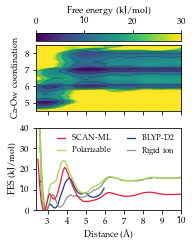

In [21]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (2.75, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

Nignore=0
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-77/molecular-dynamics/production/caco3-batches-large/CAT-COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]
cv2=colvar[Nignore:,10]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=np.amin(cv2)
ymax=np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
print(values)
print(positions)
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.07)
Z = np.reshape(kernel(positions).T, X.shape)

#factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z) #/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax[0].imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=30, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax[0], location='top')
print(np.linspace(0,30,7))
cs = ax[0].contour(X, Y, fes, levels=np.linspace(0,24,5), colors='k',vmin=0,vmax=30, linewidths=0.2)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax[0].set_xlim([xmin, xmax])
ax[0].set_ylim([ymin, ymax])

#ax[1].plot(10*ctr_bins,np.mean(fes_all_renorm,axis=0),linewidth=3)
f = interpolate.interp1d(10*ctr_bins_xlarge,np.mean(fes_all_xlarge,axis=0))
x = np.linspace(np.amin(10*ctr_bins_xlarge),np.amax(10*ctr_bins_xlarge),10000)
#ax[1].scatter(x,f(x),c=f(x),vmin=0,vmax=30,s=2)
ax[1].plot(x,f(x),label="SCAN-ML",color=paletteCaCO3[2],linewidth=1.25,zorder=2)

data=np.genfromtxt("ion-pairing-amoeba.txt")
#factor=4*np.pi*np.power(data[:,0]/10,2)
fes=data[:,1]#+(1/beta)*np.log(factor)
fes -= np.amin(fes)
ax[1].plot(data[:,0],fes,label="Polarizable",color=paletteCaCO3[0],linewidth=1.25,zorder=1)
data=np.genfromtxt("ion-pairing-blyp-d2.txt")
ax[1].plot(data[:,0],4.184*(data[:,1]-np.amin(data[:,1])),label="BLYP-D2",color=paletteFessa[0],linewidth=1.25,zorder=0)
#data=np.genfromtxt("ion-pairing-rigid-ion.txt")
data=np.genfromtxt("ion-pairing-rigid-ion-new/ca_co3_pairing/300/fes_1D.0.dat")
#factor=4*np.pi*np.power(data[:,0],2)
fes=data[:,1] #+(1/beta)*np.log(factor)
fes -= np.amin(fes)
ax[1].plot(10*data[:,0],fes,label="Rigid ion",color=paletteCaCO3[1],linewidth=1.25,zorder=0)

ax[0].set_ylim([4.5,8.5])
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([0,40])

ax[0].set_yticks([5,6,7,8])
ax[1].set_xticks([3,4,5,6,7,8,9,10])

ax[1].set_xlabel(r"Distance (\AA)")
ax[1].set_ylabel(r"FES (kJ/mol)")
ax[0].set_ylabel(r"Ca-Ow coordination")
ax[1].legend(fontsize=8, ncol= 2, handlelength=1, frameon=False)
plt.tight_layout()

#plt.savefig("ion-pairing-5.pdf",bbox_inches='tight')
#plt.savefig("ion-pairing-3.png",dpi=300,bbox_inches='tight')

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

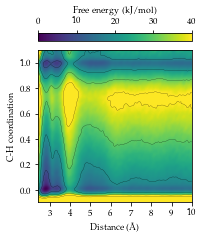

In [20]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (2.75, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#logweights[logweights>-5]=-5
#plt.scatter(time,logweights)
#plt.scatter(time,cv1,c=bias)
#plt.show()
#plt.scatter(time,bias,c=cv1)
#plt.show()
#plt.scatter(cv1,cv2,c=bias)
#plt.colorbar()
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 0
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=-0.1 # np.amin(cv2)
ymax=1.1 # np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.03)
Z = np.reshape(kernel(positions).T, X.shape)

#factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z) #/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=40, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, location='top')
cs = ax.contour(X, Y, fes, levels=np.linspace(0,40,5), colors='k',vmin=0,vmax=40, linewidths=0.2)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.set_xlabel(r"Distance (\AA)")
ax.set_ylabel(r"C-H coordination")
ax.set_xticks([3,4,5,6,7,8,9,10])

plt.savefig("carb-bicarb-5.pdf",bbox_inches='tight')
#plt.savefig("carb-bicarb-2.png",dpi=300,bbox_inches='tight')

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

# Other

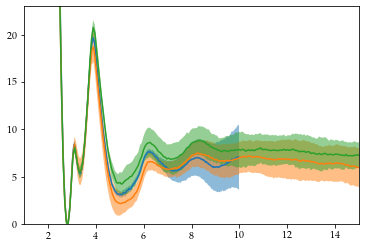

In [19]:
plt.plot(10*ctr_bins,np.mean(fes_all,axis=0))
plt.fill_between(10*ctr_bins,np.mean(fes_all,axis=0)-np.std(fes_all,axis=0),np.mean(fes_all,axis=0)+np.std(fes_all,axis=0),alpha=0.5)

plt.plot(10*ctr_bins_large,np.mean(fes_all_large,axis=0))
plt.fill_between(10*ctr_bins_large,np.mean(fes_all_large,axis=0)-np.std(fes_all_large,axis=0),np.mean(fes_all_large,axis=0)+np.std(fes_all_large,axis=0),alpha=0.5)

plt.plot(10*ctr_bins_xlarge,np.mean(fes_all_xlarge,axis=0))
plt.fill_between(10*ctr_bins_xlarge,np.mean(fes_all_xlarge,axis=0)-np.std(fes_all_xlarge,axis=0),np.mean(fes_all_xlarge,axis=0)+np.std(fes_all_xlarge,axis=0),alpha=0.5)

plt.ylim([0,23])
plt.xlim([1,15])
plt.show()

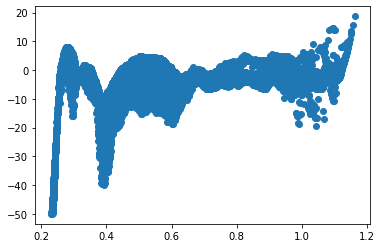

In [15]:
colvar=np.genfromtxt("iter-75/molecular-dynamics/confs/caco3/COLVAR")
Nignore=1000
cv=colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]
plt.scatter(cv,bias)

#plt.scatter(cv,colvar[Nignore:,2])
#plt.scatter(cv,colvar[Nignore:,7])

plt.show()

In [17]:
max_good_distance=17.78945/2
print(max_good_distance)

8.894725


<ipython-input-13-4bc30a3b3b7b>:16: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
<ipython-input-13-4bc30a3b3b7b>:18: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)


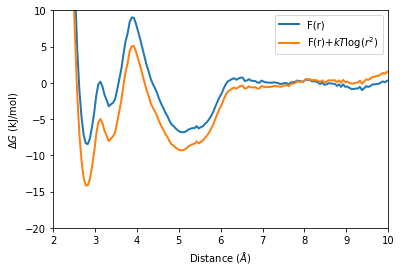

In [13]:
colvar=np.genfromtxt("iter-75/molecular-dynamics/confs/caco3/COLVAR")
Nignore=1000
cv=colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]

kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)

histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,1.5),bins=binNumber)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
fes -= np.amin(fes)
fes_renorm =-(1/beta)*np.log(histo/factor)
condition=np.logical_and(ctr_bins>0.7,ctr_bins<0.9)
fes_renorm -=np.mean(fes_renorm[condition])
fes -=np.mean(fes[condition])

plt.plot(10*ctr_bins,fes,linewidth=2.,label="F(r)")
plt.plot(10*ctr_bins,fes_renorm,linewidth=2.,label="F(r)+$kT\log(r^2$)")

plt.ylim([-20,10])
plt.xlim([2,10])

plt.legend()

plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

<ipython-input-14-6591852a0c95>:16: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
<ipython-input-14-6591852a0c95>:18: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)


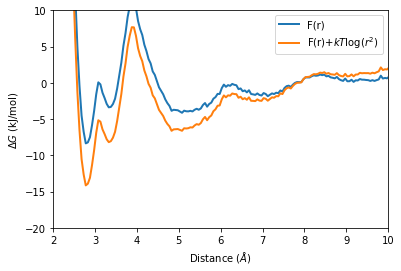

In [14]:
colvar=np.genfromtxt("iter-77/molecular-dynamics/confs/caco3/COLVAR")
Nignore=1000
cv=colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]

kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)

histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,1.5),bins=binNumber)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
fes -= np.amin(fes)
fes_renorm =-(1/beta)*np.log(histo/factor)
condition=np.logical_and(ctr_bins>0.7,ctr_bins<0.9)
fes_renorm -=np.mean(fes_renorm[condition])
fes -=np.mean(fes[condition])


plt.plot(10*ctr_bins,fes,linewidth=2.,label="F(r)")
plt.plot(10*ctr_bins,fes_renorm,linewidth=2.,label="F(r)+$kT\log(r^2$)")

plt.ylim([-20,10])
plt.xlim([2,10])

plt.legend()

plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

<ipython-input-66-fbf94c10c70e>:16: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
<ipython-input-66-fbf94c10c70e>:18: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)


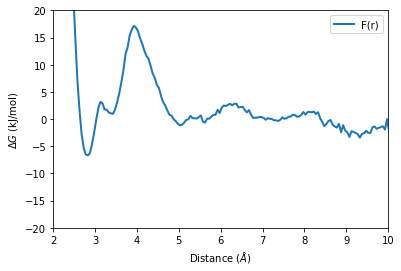

In [66]:
colvar=np.genfromtxt("iter-77/molecular-dynamics-long-range/confs/caco3-long-NVT-2/COLVAR")
Nignore=1000
cv=colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]

kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)

histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,1.5),bins=binNumber)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
fes -= np.amin(fes)
fes_renorm =-(1/beta)*np.log(histo/factor)
condition=np.logical_and(ctr_bins>0.7,ctr_bins<0.9)
fes_renorm -=np.mean(fes_renorm[condition])
fes -=np.mean(fes[condition])

plt.plot(10*ctr_bins,fes,linewidth=2.,label="F(r)")
#plt.plot(10*ctr_bins,fes_renorm,linewidth=2.,label="F(r)+$kT\log(r^2$)")

plt.ylim([-20,20])
plt.xlim([2,10])

plt.legend()

plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

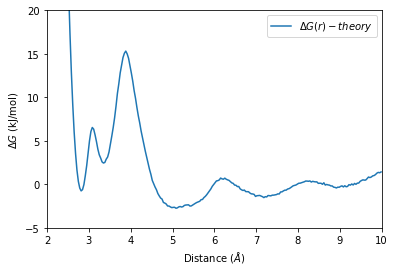

In [53]:

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102.5
delta=np.mean(fes_all,axis=0)-(-(4/(4*np.pi*eps0*eps*ctr_bins))+20-kb*temp*np.log(4*np.pi*np.power(ctr_bins,2)))
plt.plot(10*ctr_bins,delta,label="$\Delta G(r)-theory$")
#plt.fill_between(10*ctr_bins,np.mean(fes_all,axis=0)-np.std(fes_all,axis=0),np.mean(fes_all,axis=0)+np.std(fes_all,axis=0),linewidth=0,alpha=0.5)


plt.legend()

plt.ylim([-5,20])
plt.xlim([2,10])

plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


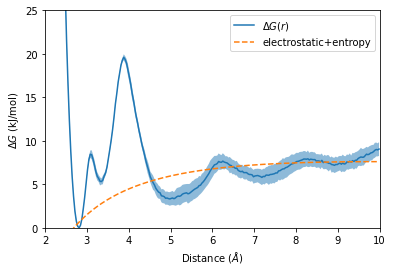

In [56]:
plt.plot(10*ctr_bins,np.mean(fes_all,axis=0),label="$\Delta G(r)$")
plt.fill_between(10*ctr_bins,np.mean(fes_all,axis=0)-np.std(fes_all,axis=0),np.mean(fes_all,axis=0)+np.std(fes_all,axis=0),linewidth=0,alpha=0.5)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins,-(4/(4*np.pi*eps0*eps*ctr_bins))+20-kb*temp*np.log(4*np.pi*np.power(ctr_bins,2)),'--',label="electrostatic+entropy")


plt.ylim([0,25])
plt.xlim([2,10])

plt.legend()


plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


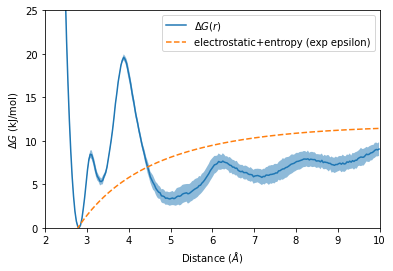

In [63]:
plt.plot(10*ctr_bins,np.mean(fes_all,axis=0),label="$\Delta G(r)$")
plt.fill_between(10*ctr_bins,np.mean(fes_all,axis=0)-np.std(fes_all,axis=0),np.mean(fes_all,axis=0)+np.std(fes_all,axis=0),linewidth=0,alpha=0.5)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=78
plt.plot(10*ctr_bins,-(4/(4*np.pi*eps0*eps*ctr_bins))+25.5-kb*temp*np.log(4*np.pi*np.power(ctr_bins,2)),'--',label="electrostatic+entropy (exp epsilon)")

kb=0.00831446261
temp=330

plt.ylim([0,25])
plt.xlim([2,10])

plt.legend()


plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


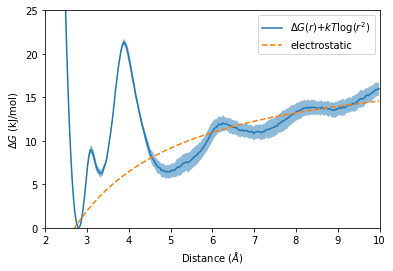

In [51]:
plt.plot(10*ctr_bins,np.mean(fes_all_renorm,axis=0),label="$\Delta G(r)$+$kT\log(r^2)$")
plt.fill_between(10*ctr_bins,np.mean(fes_all_renorm,axis=0)-np.std(fes_all_renorm,axis=0),np.mean(fes_all_renorm,axis=0)+np.std(fes_all_renorm,axis=0),linewidth=0,alpha=0.5)

plt.plot(10*ctr_bins,-(4/(4*np.pi*eps0*eps*ctr_bins))+20,'--',label="electrostatic")

kb=0.00831446261
temp=330

plt.ylim([0,25])
plt.xlim([2,10])

plt.legend()


plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

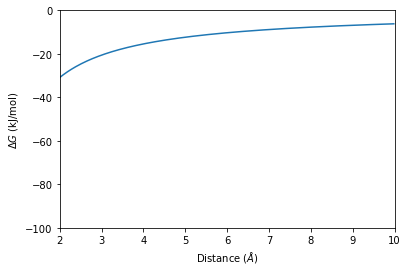

In [33]:
plt.plot(10*ctr_bins,-(4/(4*np.pi*eps0*eps*ctr_bins)))
plt.xlim([2,10])
plt.ylim([-100,0])

plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")


plt.show()

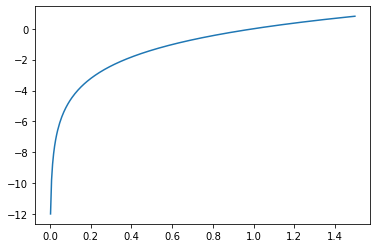

In [19]:
plt.plot(ctr_bins,np.log(np.power(ctr_bins,2)))
plt.show()

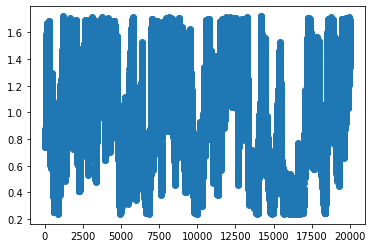

In [8]:
colvar=np.genfromtxt("iter-77/molecular-dynamics/confs/caco3-batches-large/4/COLVAR")
Nignore=1000
cv=colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]
plt.scatter(time,cv)

#plt.scatter(cv,colvar[Nignore:,2])
#plt.scatter(cv,colvar[Nignore:,7])

plt.show()

/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


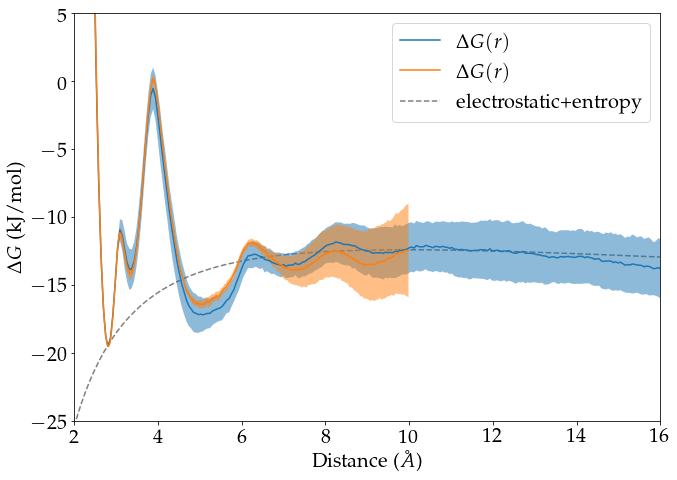

In [26]:
shift=19.5

plt.plot(10*ctr_bins_large,-shift+np.mean(fes_all_large,axis=0),label="$\Delta G(r)$")
plt.fill_between(10*ctr_bins_large,-shift+np.mean(fes_all_large,axis=0)-np.std(fes_all_large,axis=0),-shift+np.mean(fes_all_large,axis=0)+np.std(fes_all_large,axis=0),linewidth=0,alpha=0.5)

plt.plot(10*ctr_bins,-shift+np.mean(fes_all,axis=0),label="$\Delta G(r)$")
plt.fill_between(10*ctr_bins,-shift+np.mean(fes_all,axis=0)-np.std(fes_all,axis=0),-shift+np.mean(fes_all,axis=0)+np.std(fes_all,axis=0),linewidth=0,alpha=0.5)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins_large,-(4/(4*np.pi*eps0*eps*ctr_bins_large))-kb*temp*np.log(4*np.pi*np.power(ctr_bins_large,2)),'--',zorder=0,color="black",alpha=0.5,label="electrostatic+entropy")


plt.ylim([-25,5])
plt.xlim([2,16])

plt.legend()


plt.xlabel("Distance ($\AA$)")
plt.ylabel("$\Delta G$ (kJ/mol)")

plt.show()

/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


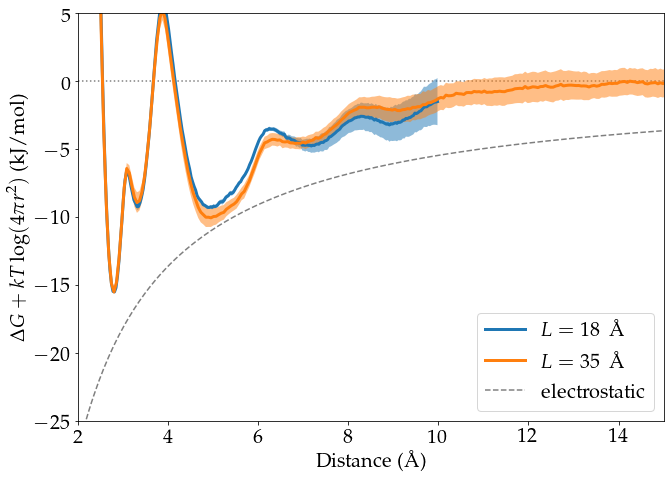

In [60]:
shift=15.5 #19.5
num_sim=4

plt.plot(10*ctr_bins,-shift+np.mean(fes_all_renorm,axis=0),linewidth=3,label=r"$L=18\:$ \AA")
plt.fill_between(10*ctr_bins,-shift+np.mean(fes_all_renorm,axis=0)-np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),-shift+np.mean(fes_all_renorm,axis=0)+np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

plt.plot(10*ctr_bins_large,-shift+np.mean(fes_all_renorm_large,axis=0),linewidth=3,label=r"$L=35\:$ \AA")
plt.fill_between(10*ctr_bins_large,-shift+np.mean(fes_all_renorm_large,axis=0)-np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),-shift+np.mean(fes_all_renorm_large,axis=0)+np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins_large,-(4/(4*np.pi*eps0*eps*ctr_bins_large)),'--',zorder=0,color="black",alpha=0.5,label="electrostatic")
plt.plot([2,15],[0,0],':',zorder=0,color="black",alpha=0.5)


plt.ylim([-25,5])
plt.xlim([2,15])

plt.legend(loc='lower right')


plt.xlabel(r"Distance (\AA)")
plt.ylabel("$\Delta G+kT\log(4 \pi r^2)$ (kJ/mol)")

plt.show()

In [61]:
W=-shift+np.mean(fes_all_renorm_large,axis=0)
condition=ctr_bins_large<1.5
kb=0.00831446261
temp=330
beta=1/(kb*temp)
integral=np.trapz(np.exp(-beta*W[condition])*4*np.pi*np.power(ctr_bins_large[condition],2),x=ctr_bins_large[condition])
c0=1/1660 #(1/A^3)
c0nm=c0*1000
print(c0,c0nm)
print(-kb*temp*np.log(c0nm*integral))

0.0006024096385542169 0.6024096385542169
-8.883534859744895


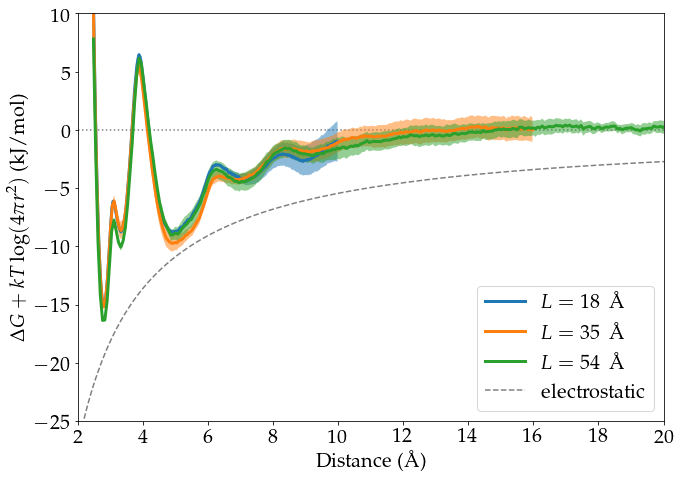

In [30]:
num_sim=4

shift1=15.
plt.plot(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0),linewidth=3,label=r"$L=18\:$ \AA")
plt.fill_between(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0)-np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),-shift1+np.mean(fes_all_renorm,axis=0)+np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

shift2=15.2
plt.plot(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0),linewidth=3,label=r"$L=35\:$ \AA")
plt.fill_between(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0)-np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),-shift2+np.mean(fes_all_renorm_large,axis=0)+np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

shift3=16.4
plt.plot(10*ctr_bins_xlarge,-shift3+np.mean(fes_all_renorm_xlarge,axis=0),linewidth=3,label=r"$L=54\:$ \AA")
plt.fill_between(10*ctr_bins_xlarge,-shift3+np.mean(fes_all_renorm_xlarge,axis=0)-np.std(fes_all_renorm_xlarge,axis=0)/np.sqrt(num_sim),-shift3+np.mean(fes_all_renorm_xlarge,axis=0)+np.std(fes_all_renorm_xlarge,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins_xlarge,-(4/(4*np.pi*eps0*eps*ctr_bins_xlarge)),'--',zorder=0,color="black",alpha=0.5,label="electrostatic")
plt.plot([2,25],[0,0],':',zorder=0,color="black",alpha=0.5)

plt.ylim([-25,10])
plt.xlim([2,20])

plt.legend(loc='lower right')


plt.xlabel(r"Distance (\AA)")
plt.ylabel("$\Delta G+kT\log(4 \pi r^2)$ (kJ/mol)")

plt.show()

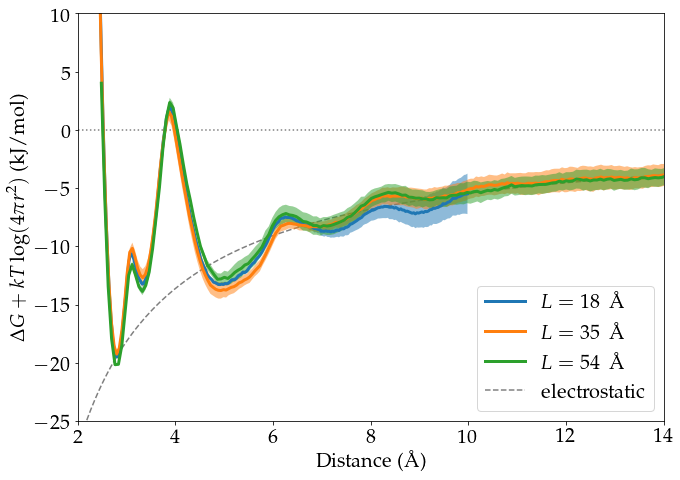

In [28]:
num_sim=4


shift1=19.5
plt.plot(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0),linewidth=3,label=r"$L=18\:$ \AA")
plt.fill_between(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0)-np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),-shift1+np.mean(fes_all_renorm,axis=0)+np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

shift2=19.25
plt.plot(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0),linewidth=3,label=r"$L=35\:$ \AA")
plt.fill_between(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0)-np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),-shift2+np.mean(fes_all_renorm_large,axis=0)+np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

shift3=20.2
plt.plot(10*ctr_bins_xlarge,-shift3+np.mean(fes_all_renorm_xlarge,axis=0),linewidth=3,label=r"$L=54\:$ \AA")
plt.fill_between(10*ctr_bins_xlarge,-shift3+np.mean(fes_all_renorm_xlarge,axis=0)-np.std(fes_all_renorm_xlarge,axis=0)/np.sqrt(num_sim),-shift3+np.mean(fes_all_renorm_xlarge,axis=0)+np.std(fes_all_renorm_xlarge,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins_xlarge,-(4/(4*np.pi*eps0*eps*ctr_bins_xlarge)),'--',zorder=0,color="black",alpha=0.5,label="electrostatic")
plt.plot([2,25],[0,0],':',zorder=0,color="black",alpha=0.5)

plt.ylim([-25,10])
plt.xlim([2,14])

plt.legend(loc='lower right')


plt.xlabel(r"Distance (\AA)")
plt.ylabel("$\Delta G+kT\log(4 \pi r^2)$ (kJ/mol)")

plt.show()

(4, 300)


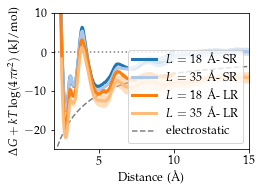

In [83]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


num_sim=4

colors2=np.array([plt.cm.tab20(i) for i in range(10)])
                 
shift1=15
plt.plot(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0),linewidth=3,label=r"$L=18\:$ \AA - SR",color=colors2[0])
plt.fill_between(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0)-np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),-shift1+np.mean(fes_all_renorm,axis=0)+np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[0])

shift2=15
plt.plot(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0),linewidth=3,label=r"$L=35\:$ \AA - SR",color=colors2[1])
plt.fill_between(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0)-np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),-shift2+np.mean(fes_all_renorm_large,axis=0)+np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[1])

shift4=19
plt.plot(10*ctr_bins,-shift4+np.mean(fes_all_renorm_lr,axis=0),linewidth=3,label=r"$L=18\:$ \AA - LR",color=colors2[2])
plt.fill_between(10*ctr_bins,-shift4+np.mean(fes_all_renorm_lr,axis=0)-np.std(fes_all_renorm_lr,axis=0)/np.sqrt(num_sim),-shift4+np.mean(fes_all_renorm_lr,axis=0)+np.std(fes_all_renorm_lr,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[2])

shift5=22
plt.plot(10*ctr_bins_large,-shift5+np.mean(fes_all_renorm_large_lr,axis=0),linewidth=3,label=r"$L=35\:$ \AA - LR",color=colors2[3])
plt.fill_between(10*ctr_bins_large,-shift5+np.mean(fes_all_renorm_large_lr,axis=0)-np.std(fes_all_renorm_large_lr,axis=0)/np.sqrt(num_sim),-shift5+np.mean(fes_all_renorm_large_lr,axis=0)+np.std(fes_all_renorm_large_lr,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[3])

print(fes_all_renorm_large_lr.shape)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins_large,-(4/(4*np.pi*eps0*eps*ctr_bins_large)),'--',zorder=0,color="black",alpha=0.5,label="electrostatic")
plt.plot([2,25],[0,0],':',zorder=0,color="black",alpha=0.5)

plt.ylim([-25,10])
plt.xlim([2,15])

plt.legend(loc='lower right')


plt.xlabel(r"Distance (\AA)")
plt.ylabel("$\Delta G+kT\log(4 \pi r^2)$ (kJ/mol)")


#plt.savefig("plot-long-range.png",dpi=300,bbox_inches="tight")


plt.show()

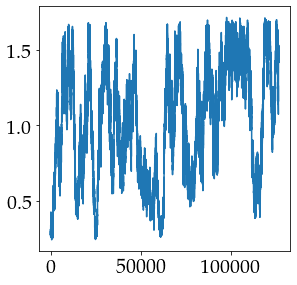

In [21]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*1.5, 3*1.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


colvar=np.genfromtxt("iter-79/molecular-dynamics-long-range/production/caco3-med-batches/1/COLVAR")
plt.plot(colvar[:,1])


plt.show()

(4, 300)


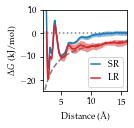

In [84]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (1.5, 1.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


num_sim=4

colors2=np.array([plt.cm.tab20(i) for i in range(10)])
                 
#shift1=15
#plt.plot(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0),linewidth=3,label=r"$L=18\:$ \AA - SR",color=colors2[0])
#plt.fill_between(10*ctr_bins,-shift1+np.mean(fes_all_renorm,axis=0)-np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),-shift1+np.mean(fes_all_renorm,axis=0)+np.std(fes_all_renorm,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[0])

shift2=15
plt.plot(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0),linewidth=1.5,label=r"SR",color=colors2[0])
plt.fill_between(10*ctr_bins_large,-shift2+np.mean(fes_all_renorm_large,axis=0)-np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),-shift2+np.mean(fes_all_renorm_large,axis=0)+np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[0])

#shift4=19
#plt.plot(10*ctr_bins,-shift4+np.mean(fes_all_renorm_lr,axis=0),linewidth=3,label=r"$L=18\:$ \AA - LR",color=colors2[2])
#plt.fill_between(10*ctr_bins,-shift4+np.mean(fes_all_renorm_lr,axis=0)-np.std(fes_all_renorm_lr,axis=0)/np.sqrt(num_sim),-shift4+np.mean(fes_all_renorm_lr,axis=0)+np.std(fes_all_renorm_lr,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[2])

shift5=19.75
plt.plot(10*ctr_bins_large,-shift5+np.mean(fes_all_renorm_large_lr,axis=0),linewidth=1.5,label=r"LR",color=colors2[6])
plt.fill_between(10*ctr_bins_large,-shift5+np.mean(fes_all_renorm_large_lr,axis=0)-np.std(fes_all_renorm_large_lr,axis=0)/np.sqrt(num_sim),-shift5+np.mean(fes_all_renorm_large_lr,axis=0)+np.std(fes_all_renorm_large_lr,axis=0)/np.sqrt(num_sim),linewidth=0,alpha=0.5,color=colors2[6])

print(fes_all_renorm_large_lr.shape)

eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=102
kb=0.00831446261
temp=330
plt.plot(10*ctr_bins_large,-(4/(4*np.pi*eps0*eps*ctr_bins_large)),'--',zorder=0,color="black",alpha=0.5) #,label="electrostatic")
plt.plot([2,25],[0,0],':',zorder=0,color="black",alpha=0.5)

plt.ylim([-25,10])
plt.xlim([2,16])

plt.legend(loc='lower right',handlelength=1)


plt.xlabel(r"Distance (\AA)")
plt.ylabel("$\Delta G$ (kJ/mol)")


#plt.savefig("plot-sr-vs-lr.pdf",bbox_inches="tight")


plt.show()

-8.420630824902586
-12.935494774074366


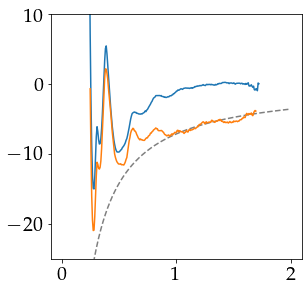

In [95]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*1.5, 3*1.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


shift2=15
W=-shift2+np.mean(fes_all_renorm_large,axis=0) # - np.nan_to_num(np.std(fes_all_renorm_large,axis=0)/np.sqrt(num_sim))
condition=ctr_bins_large<1.4
kb=0.00831446261
temp=330
beta=1/(kb*temp)
integral=np.trapz(np.exp(-beta*W[condition])*4*np.pi*np.power(ctr_bins_large[condition],2),x=ctr_bins_large[condition])
c0=1/1660 #(1/A^3)
c0nm=c0*1000
print(-kb*temp*np.log(c0nm*integral))

plt.plot(ctr_bins_large,W)

shift5=21
W=-shift5+np.mean(fes_all_renorm_large_lr,axis=0) # - np.nan_to_num(np.std(fes_all_renorm_large_lr,axis=0)/np.sqrt(num_sim))
condition=ctr_bins_large<1.4
kb=0.00831446261
temp=330
beta=1/(kb*temp)
integral=np.trapz(np.exp(-beta*W[condition])*4*np.pi*np.power(ctr_bins_large[condition],2),x=ctr_bins_large[condition])
c0=1/1660 #(1/A^3)
c0nm=c0*1000
print(-kb*temp*np.log(c0nm*integral))


plt.plot(ctr_bins_large,W)


eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=78
kb=0.00831446261
plt.plot(ctr_bins_large,-(4/(4*np.pi*eps0*eps*ctr_bins_large)),'--',zorder=0,color="black",alpha=0.5) #,label="electrostatic")


plt.ylim([-25,10])

plt.show()
# -8.4(5)
# -12.4(5)

-19.311451364885247


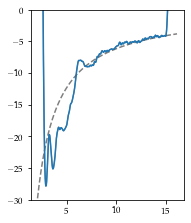

In [60]:
eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=90
kb=0.00831446261
temp=300
beta=1/(kb*temp)
shift_ri=28

data=np.genfromtxt("ion-pairing-rigid-ion-new/ca_co3_pairing/300/fes_1D.0.dat")
factor=4*np.pi*np.power(data[:,0],2)
plt.plot(10*data[:,0],(data[:,1]-np.amin(data[:,1]))-shift_ri+(1/beta)*np.log(factor),label="Rigid ion",color=paletteCaCO3[1],linewidth=1.25,zorder=0)
plt.plot(10*data[:,0],-(4/(4*np.pi*eps0*eps*data[:,0])),'--',zorder=0,color="black",alpha=0.5) #,label="electrostatic")

factor=4*np.pi*np.power(data[:,0],2)
W=-shift_ri+ (data[:,1]-np.amin(data[:,1]))+(1/beta)*np.log(factor)

plt.plot(10*data[:,0],W)

condition=data[:,0]<1.4
kb=0.00831446261
temp=300
beta=1/(kb*temp)
integral=np.trapz(np.exp(-beta*W[condition])*4*np.pi*np.power(data[condition,0],2),x=data[condition,0])
c0=1/1660 #(1/A^3)
c0nm=c0*1000
print(-kb*temp*np.log(c0nm*integral))

plt.ylim([-30,0])
plt.show()

-16.690629562930425


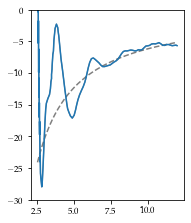

In [62]:
eps0=5.727*1.e-4 # e^2 / (kJ/mol angstrom)
eps=90
kb=0.00831446261
temp=300
beta=1/(kb*temp)
shift_ri=28

data=np.genfromtxt("ion-pairing-amoeba.txt")
data[:,0] *= 0.1
factor=4*np.pi*np.power(data[:,0],2)
plt.plot(10*data[:,0],(data[:,1]-np.amin(data[:,1]))-shift_ri+(1/beta)*np.log(factor),label="Rigid ion",color=paletteCaCO3[1],linewidth=1.25,zorder=0)
plt.plot(10*data[:,0],-(4/(4*np.pi*eps0*eps*data[:,0])),'--',zorder=0,color="black",alpha=0.5) #,label="electrostatic")

factor=4*np.pi*np.power(data[:,0],2)
W=-shift_ri+ (data[:,1]-np.amin(data[:,1]))+(1/beta)*np.log(factor)

plt.plot(10*data[:,0],W)

condition=data[:,0]<1.4
kb=0.00831446261
temp=300
beta=1/(kb*temp)
integral=np.trapz(np.exp(-beta*W[condition])*4*np.pi*np.power(data[condition,0],2),x=data[condition,0])
c0=1/1660 #(1/A^3)
c0nm=c0*1000
print(-kb*temp*np.log(c0nm*integral))

plt.ylim([-30,0])
plt.show()

/tmp/ipykernel_2838235/851511034.py:16: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(H)


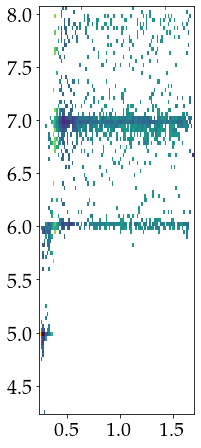

In [13]:
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-77/molecular-dynamics/production/caco3-batches-large/1/Analysis/COLVAR")
cv1=colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,2]+colvar[Nignore:,7]
cv2=colvar[Nignore:,10]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)
H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H = H.T
fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(fes, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

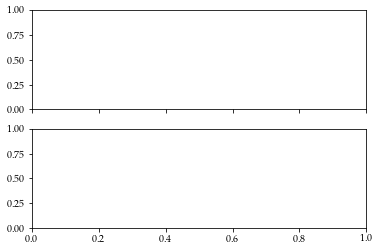

In [8]:
fig2, ax2 = plt.subplots(nrows=2, ncols=1, sharex=True)

In [50]:
numSim=4
Nignore=1000
fes_all=np.zeros([numSim,binNumber])
fes_all_renorm=np.zeros([numSim,binNumber])
for i in range(numSim):
    colvar=np.genfromtxt("iter-77/molecular-dynamics/production/caco3-batches/" + str(i+1) + "/COLVAR")
    cv=colvar[Nignore:,1]
    time=colvar[Nignore:,0]
    bias=colvar[Nignore:,2]+colvar[Nignore:,7]
    kb=0.00831446261
    temp=330
    beta=1/(kb*temp)
    logweights=beta*bias
    logweights -= np.amax(logweights)
    histo, bins = np.histogram(cv,weights=np.exp(logweights),range=(0,1.0),bins=binNumber)
    ctr_bins=(bins[1:]+bins[:-1])/2
    factor=4*np.pi*np.power(ctr_bins,2)
    fes=-(1/beta)*np.log(histo)
    fes -= np.amin(fes)
    fes_renorm = -(1/beta)*np.log(histo/factor)
    condition=np.logical_and(ctr_bins>0.6,ctr_bins<0.9)
    #baseline=np.mean(fes_renorm[condition])
    #fes_renorm -= baseline
    fes_renorm -= np.amin(fes_renorm)
    fes_all[i,:] = fes
    fes_all_renorm[i,:] = fes_renorm

/tmp/ipykernel_1688150/3948826598.py:18: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_1688150/3948826598.py:20: RuntimeWarning: divide by zero encountered in log
  fes_renorm = -(1/beta)*np.log(histo/factor)


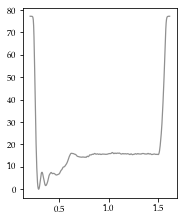

In [12]:
data=np.genfromtxt("ion-pairing-rigid-ion-new/ca_co3_pairing/300/fes_1D.0.dat")
plt.plot(data[:,0],(data[:,1]-np.amin(data[:,1])),label="Rigid ion",color=paletteCaCO3[1],linewidth=1.25,zorder=0)
plt.show()

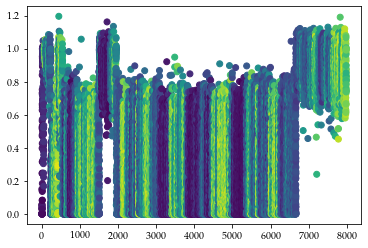

In [99]:
Nignore=0
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
plt.scatter(time,cv2,c=cv1)
#plt.xlim([1400,2500])
plt.show()

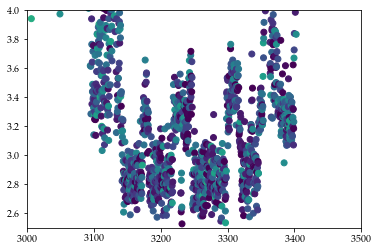

In [102]:
Nignore=0
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
plt.scatter(time,cv1,c=cv2)
plt.ylim([2.5,4])
plt.xlim([3000,3500])
plt.show()

In [29]:
Nignore=0
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]

steps=time[np.logical_and(cv1<3.3,np.logical_and(cv2>0.5,cv2<0.75))]/0.5
print(steps[-20:])



[10711.  10713.5 10714.  10714.5 10715.  10715.5 10718.  10718.5 10720.5
 10721.  10721.5 10722.5 10723.  10723.5 10727.  10728.5 10731.  10732.
 12685.  12725.5]


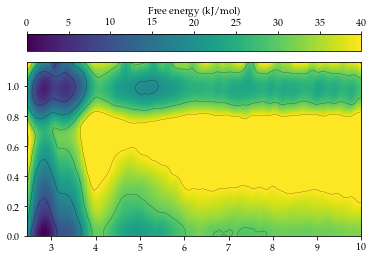

In [74]:
Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#logweights[logweights>-5]=-5
#plt.scatter(time,logweights)
#plt.scatter(time,cv1,c=bias)
#plt.show()
#plt.scatter(time,bias,c=cv1)
#plt.show()
#plt.scatter(cv1,cv2,c=bias)
#plt.colorbar()
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 0
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=np.amin(cv2)
ymax=np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.1)
Z = np.reshape(kernel(positions).T, X.shape)

factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=40, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, location='top')
cs = ax.contour(X, Y, fes, levels=np.linspace(0,40,5), colors='k',vmin=0,vmax=40, linewidths=0.2)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

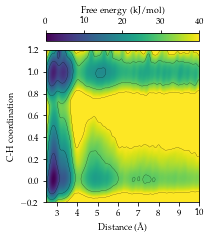

In [13]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (2.75, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#logweights[logweights>-5]=-5
#plt.scatter(time,logweights)
#plt.scatter(time,cv1,c=bias)
#plt.show()
#plt.scatter(time,bias,c=cv1)
#plt.show()
#plt.scatter(cv1,cv2,c=bias)
#plt.colorbar()
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 0
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=-0.2 # np.amin(cv2)
ymax=1.2 # np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.1)
Z = np.reshape(kernel(positions).T, X.shape)

factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=40, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, location='top')
cs = ax.contour(X, Y, fes, levels=np.linspace(0,40,5), colors='k',vmin=0,vmax=40, linewidths=0.2)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.set_xlabel(r"Distance (\AA)")
ax.set_ylabel(r"C-H coordination")
ax.set_xticks([3,4,5,6,7,8,9,10])

plt.savefig("carb-bicarb-2.pdf",bbox_inches='tight')
#plt.savefig("carb-bicarb-2.png",dpi=300,bbox_inches='tight')

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

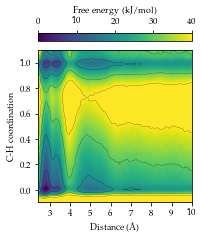

In [19]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (2.75, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#logweights[logweights>-5]=-5
#plt.scatter(time,logweights)
#plt.scatter(time,cv1,c=bias)
#plt.show()
#plt.scatter(time,bias,c=cv1)
#plt.show()
#plt.scatter(cv1,cv2,c=bias)
#plt.colorbar()
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 0
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=-0.1 # np.amin(cv2)
ymax=1.1 # np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.03)
Z = np.reshape(kernel(positions).T, X.shape)

factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=40, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, location='top')
cs = ax.contour(X, Y, fes, levels=np.linspace(0,40,5), colors='k',vmin=0,vmax=40, linewidths=0.2)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.set_xlabel(r"Distance (\AA)")
ax.set_ylabel(r"C-H coordination")
ax.set_xticks([3,4,5,6,7,8,9,10])

plt.savefig("carb-bicarb-4.pdf",bbox_inches='tight')
#plt.savefig("carb-bicarb-2.png",dpi=300,bbox_inches='tight')

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

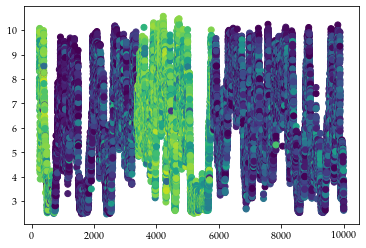

In [12]:
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-2/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]

plt.scatter(time,cv1,c=cv2)
plt.show()


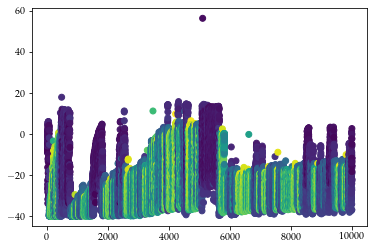

In [14]:
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-2/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]

plt.scatter(time,bias,c=cv1)
plt.show()


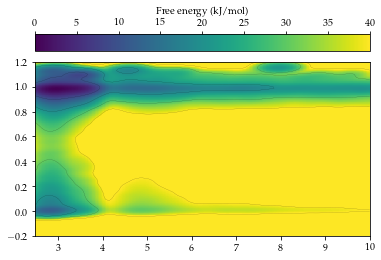

In [13]:
Nignore=100
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-2/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#logweights[logweights>-5]=-5
#plt.scatter(time,logweights)
#plt.scatter(time,cv1,c=bias)
#plt.show()
#plt.scatter(time,bias,c=cv1)
#plt.show()
#plt.scatter(cv1,cv2,c=bias)
#plt.colorbar()
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 0
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=-0.2 # np.amin(cv2)
ymax=1.2 # np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.2)
Z = np.reshape(kernel(positions).T, X.shape)

factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=40, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, location='top')
cs = ax.contour(X, Y, fes, levels=np.linspace(0,40,5), colors='k',vmin=0,vmax=40, linewidths=0.1)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

(31944, 12)


/tmp/ipykernel_2914591/4132542648.py:46: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(Z/factor)


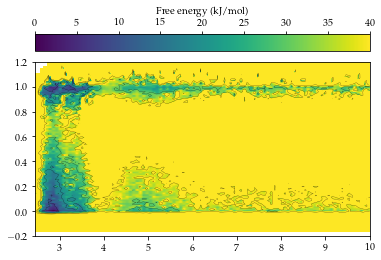

In [98]:
Nignore=5000
Nmax=-1
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns/COLVAR")
print(colvar.shape)
cv1=10*colvar[Nignore:Nmax,1]
time=colvar[Nignore:Nmax,0]
bias=colvar[Nignore:Nmax,3]+colvar[Nignore:Nmax,8]+colvar[Nignore:Nmax,10]
cv2=colvar[Nignore:Nmax,2]
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#logweights[logweights>-5]=-5
#plt.scatter(time,logweights)
#plt.scatter(time,cv1,c=bias)
#plt.show()
#plt.scatter(time,bias,c=cv1)
#plt.show()
#plt.scatter(cv1,cv2,c=bias)
#plt.colorbar()
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 0
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=-0.2 # np.amin(cv2)
ymax=1.2 # np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.01)
Z = np.reshape(kernel(positions).T, X.shape)

factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#plt.sca(ax[0]) 
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=40, aspect='auto')

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, location='top')
cs = ax.contour(X, Y, fes, levels=np.linspace(0,40,5), colors='k',vmin=0,vmax=40, linewidths=0.2)
#ax[0].contour(cs, colors='k')
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

418.4041311540341


/tmp/ipykernel_1688150/1893011288.py:45: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_1688150/1893011288.py:47: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)
/tmp/ipykernel_1688150/1893011288.py:56: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_1688150/1893011288.py:59: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)


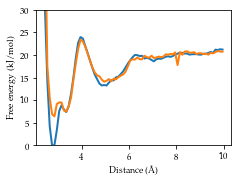

In [24]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

binNumber2=100
Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 200
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

norm=np.sum(np.exp(logweights))
print(norm)

condition = (cv2 < 0.7)
histo, bins = np.histogram(cv1[condition],weights=np.exp(logweights[condition])/norm,range=(0,10),bins=binNumber2)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
#print(np.amin(fes))
fes_renorm =-(1/beta)*np.log(histo/factor)
min1 = np.amin(fes_renorm)
fes_renorm -= min1
plt.plot(ctr_bins,fes_renorm,linewidth=2.,label="F(r)")

condition = (cv2 > 0.7)
histo, bins = np.histogram(cv1[condition],weights=np.exp(logweights[condition])/norm,range=(0,10),bins=binNumber2)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
#print(np.amin(fes))
#fes -= np.amin(fes)
fes_renorm =-(1/beta)*np.log(histo/factor)
fes_renorm -= min1
plt.plot(ctr_bins,fes_renorm,linewidth=2.,label="F(r)")
plt.ylim([0,30])

plt.ylabel('Free energy (kJ/mol)')
plt.xlabel(r"Distance (\AA)")

plt.savefig("carb-bicarb-along-dist.pdf",bbox_inches='tight')

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

In [34]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

binNumber2=100
Nignore=10000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 200
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

norm=np.sum(np.exp(logweights))

condition1 = np.logical_and(cv2 < 0.7, cv1 < 4)
condition2 = np.logical_and(cv2 > 0.7, cv1 < 4)
print(-(1/beta)*np.log(np.sum(np.exp(logweights[condition1]))/np.sum(np.exp(logweights[condition2]))))

condition1 = np.logical_and(cv2 < 0.7, np.logical_and(cv1 > 4,cv1 < 6))
condition2 = np.logical_and(cv2 > 0.7, np.logical_and(cv1 > 4,cv1 < 6))
print(-(1/beta)*np.log(np.sum(np.exp(logweights[condition1]))/np.sum(np.exp(logweights[condition2]))))

condition1 = np.logical_and(cv2 < 0.7, cv1 > 6)
condition2 = np.logical_and(cv2 > 0.7, cv1 > 6)
print(-(1/beta)*np.log(np.sum(np.exp(logweights[condition1]))/np.sum(np.exp(logweights[condition2]))))


-5.870682064760715
-0.35065994808485007
-0.0768627364526303


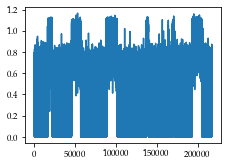

In [35]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

binNumber2=100
Nignore=10000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]

plt.plot(cv2)
plt.show()

In [33]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

binNumber2=100
Nignore=10000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
Nmax=int(colvar.shape[0]/2)
cv1=10*colvar[Nignore:Nmax,1]
time=colvar[Nignore:Nmax,0]
bias=colvar[Nignore:Nmax,3]+colvar[Nignore:Nmax,8]+colvar[Nignore:Nmax,10]
cv2=colvar[Nignore:Nmax,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 200
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

norm=np.sum(np.exp(logweights))

condition1 = np.logical_and(cv2 < 0.7, cv1 < 4)
condition2 = np.logical_and(cv2 > 0.7, cv1 < 4)
print(-(1/beta)*np.log(np.sum(np.exp(logweights[condition1]))/np.sum(np.exp(logweights[condition2]))))

condition1 = np.logical_and(cv2 < 0.7, np.logical_and(cv1 > 4,cv1 < 6))
condition2 = np.logical_and(cv2 > 0.7, np.logical_and(cv1 > 4,cv1 < 6))
print(-(1/beta)*np.log(np.sum(np.exp(logweights[condition1]))/np.sum(np.exp(logweights[condition2]))))

condition1 = np.logical_and(cv2 < 0.7, cv1 > 6)
condition2 = np.logical_and(cv2 > 0.7, cv1 > 6)
print(-(1/beta)*np.log(np.sum(np.exp(logweights[condition1]))/np.sum(np.exp(logweights[condition2]))))





-4.7521443966383625
3.640520594578534
3.2520598768003905


/tmp/ipykernel_1688150/3546384030.py:30: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_1688150/3546384030.py:40: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)


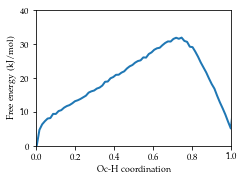

In [36]:
binNumber2=100
Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-continue-continue/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
# Remove points
condition=bias<40
time=time[condition]
cv1=cv1[condition]
cv2=cv2[condition]
bias=bias[condition]
# done
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 200
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

condition = (cv1 < 4)
histo, bins = np.histogram(cv2[condition],weights=np.exp(logweights[condition]),range=(-0.2,1.2),bins=binNumber2)
ctr_bins=(bins[1:]+bins[:-1])/2
fes=-(1/beta)*np.log(histo)
#print(np.amin(fes))
#fes -= np.amin(fes)
min1 = np.amin(fes)
fes-= min1
plt.plot(ctr_bins,fes,linewidth=2.,label="F(r)")

condition = (cv1 > 9)
histo, bins = np.histogram(cv2[condition],weights=np.exp(logweights[condition]),range=(-0.2,1.2),bins=binNumber2)
ctr_bins=(bins[1:]+bins[:-1])/2
fes=-(1/beta)*np.log(histo)
#print(np.amin(fes))
#fes -= np.amin(fes)
fes-= min1
#plt.plot(ctr_bins,fes,linewidth=2.,label="F(r)")
plt.xlim([0,1])
plt.ylim([0,40])

plt.ylabel('Free energy (kJ/mol)')
plt.xlabel(r"Oc-H coordination")

plt.savefig("carb-bicarb-along-coord.pdf",bbox_inches='tight')

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

/tmp/ipykernel_1081347/91923680.py:30: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_1081347/91923680.py:33: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)
/tmp/ipykernel_1081347/91923680.py:40: RuntimeWarning: divide by zero encountered in log
  fes=-(1/beta)*np.log(histo)
/tmp/ipykernel_1081347/91923680.py:43: RuntimeWarning: divide by zero encountered in log
  fes_renorm =-(1/beta)*np.log(histo/factor)


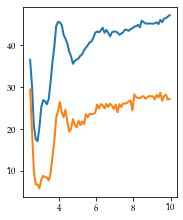

In [18]:
binNumber2=100
Nignore=1000
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-93/molecular-dynamics/confs/caco3-2cv-10ns-2/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]+colvar[Nignore:,10]
cv2=colvar[Nignore:,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
# Remove points
time=time[bias<30]
cv1=cv1[bias<30]
cv2=cv2[bias<30]
bias=bias[bias<30]
# done
logweights=beta*bias
logweights -= np.amax(logweights)
#plt.scatter(time,logweights)
#plt.show()
#cv1[~np.isfinite(cv1)] = 0
#cv2[~np.isfinite(cv2)] = 0
#logweights[~np.isfinite(logweights)] = 200
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

condition = (cv2 < 0.5)
histo, bins = np.histogram(cv1[condition],weights=np.exp(logweights[condition]),range=(0,10),bins=binNumber2)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
#print(np.amin(fes))
#fes -= np.amin(fes)
fes_renorm =-(1/beta)*np.log(histo/factor)
plt.plot(ctr_bins,fes_renorm,linewidth=2.,label="F(r)")

condition = (cv2 > 0.5)
histo, bins = np.histogram(cv1[condition],weights=np.exp(logweights[condition]),range=(0,10),bins=binNumber2)
ctr_bins=(bins[1:]+bins[:-1])/2
factor=4*np.pi*np.power(ctr_bins,2)
fes=-(1/beta)*np.log(histo)
#print(np.amin(fes))
#fes -= np.amin(fes)
fes_renorm =-(1/beta)*np.log(histo/factor)
plt.plot(ctr_bins,fes_renorm,linewidth=2.,label="F(r)")

plt.show()

#H, xedges, yedges = np.histogram2d(cv1,cv2, bins=100, weights=np.exp(logweights))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
#H = H.T
#fes=-(1/beta)*np.log(H)
#fig = plt.figure(figsize=(7, 3))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(fes, interpolation='nearest', origin='lower',
#        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#plt.show()
#ctr_bins_xlarge=(bins[1:]+bins[:-1])/2
#factor=4*np.pi*np.power(ctr_bins_large,2)
#fes=-(1/beta)*np.log(histo)
#fes -= np.amin(fes)
#fes_renorm = -(1/beta)*np.log(histo/factor)
#fes_renorm -= np.amin(fes_renorm)
#fes_all_xlarge[i,:] = fes
#fes_all_renorm_xlarge[i,:] = fes_renorm

In [12]:
plt.plot(10*ctr_bins,np.mean(fes_all_renorm,axis=0))
plt.xlim([2.5,4])
plt.ylim([0,20])
plt.show()

NameError: name 'ctr_bins' is not defined

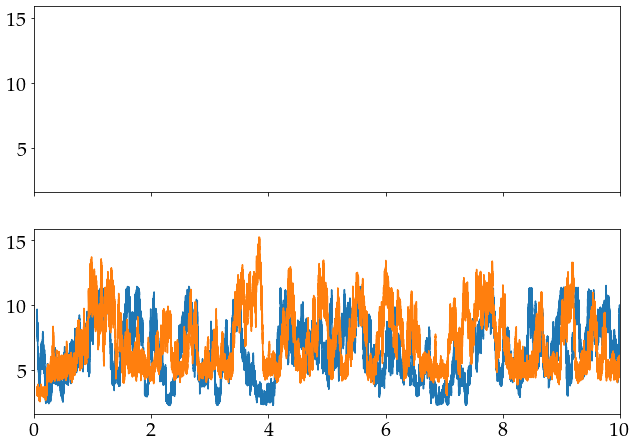

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-77/molecular-dynamics/production/caco3-batches/4/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
ax[1].plot(time/1000,cv1)

colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-77/molecular-dynamics/production/caco3-noenhancedsampling/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
ax[1].plot(time/1000,cv1)

ax[0].set_xlim([0,10])
plt.show()

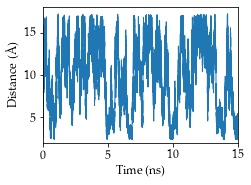

In [18]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

Nignore=0
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-77/molecular-dynamics/production/caco3-batches-large/4/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
ax.plot(time/1000,cv1,linewidth=1)
ax.set_xlabel(r"Time (ns)")
ax.set_ylabel(r"Distance (\AA)")


ax.set_xlim([0,15])
ax.set_ylim([2,18])

plt.savefig("plot-es.png",dpi=300,bbox_inches="tight")
plt.show()

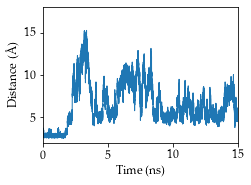

In [19]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

Nignore=0
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-77/molecular-dynamics/production/caco3-noenhancedsampling-2/COLVAR")
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
ax.plot(4*time/1000,cv1,linewidth=1)
ax.set_xlabel(r"Time (ns)")
ax.set_ylabel(r"Distance (\AA)")


ax.set_xlim([0,15])
ax.set_ylim([2,18])

plt.savefig("plot-no-es.png",dpi=300,bbox_inches="tight")

plt.show()

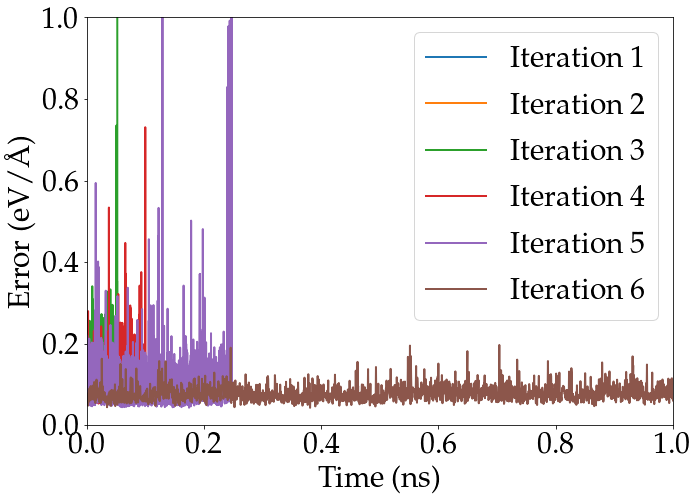

In [40]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.5, 3*2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

counter=0
for i in [1,10,20,30,40,75]:
    counter += 1
    try:
        colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-" + str(i) + "/molecular-dynamics/confs/caco3/md.out")
    except:
        print("Bad file")
    error=colvar[:,4]
    step=colvar[:,0]
    ax.plot(step*0.0005/1000,error,linewidth=2,label="Iteration " + str(counter))

ax.set_xlabel(r"Time (ns)")
ax.set_ylabel(r"Error (eV/\AA)")
plt.legend()

ax.set_xlim([0,1])
ax.set_ylim([0,1])

plt.show()

[[9.13257e+00 8.92852e+00 8.77230e+00 ... 8.86737e+00 8.94612e+00
  8.84158e+00]
 [2.69040e-01 5.10940e-02 7.00000e-04 ... 4.97120e-01 0.00000e+00
  2.24700e-03]]
[[ 2.40682     2.40682     2.40682    ... 10.         10.
  10.        ]
 [-0.25       -0.23484848 -0.21969697 ...  1.21969697  1.23484848
   1.25      ]]


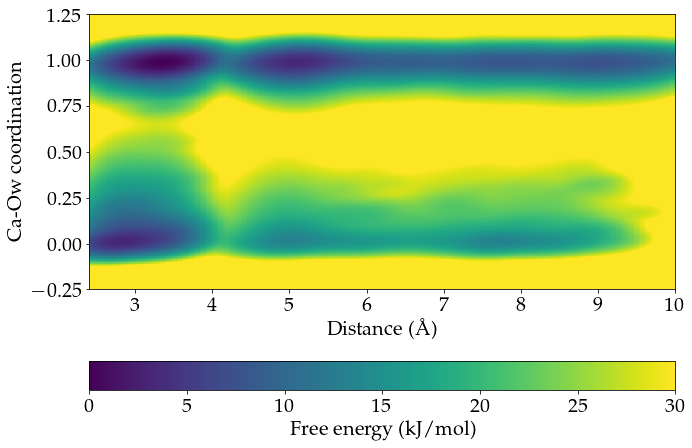

In [17]:
colvar=np.genfromtxt("/scratch/gpfs/ppiaggi/Simulations/CaCO3/iter-86/molecular-dynamics/confs/caco3-2cv-2/COLVAR")
Nignore=1000
cv1=10*colvar[Nignore:,1]
time=colvar[Nignore:,0]
bias=colvar[Nignore:,3]+colvar[Nignore:,8]
cv2=colvar[Nignore:,2]
kb=0.00831446261
temp=330
beta=1/(kb*temp)
logweights=beta*bias
logweights -= np.amax(logweights)
#histo, bins = np.histogram2d(cv1,cv2,weights=np.exp(logweights),range=(0,2.1),bins=binNumber)

xmin=np.amin(cv1)
xmax=10. #np.amax(cv1)
ymin=-0.25 #np.amin(cv2)
ymax=1.25 #np.amax(cv2)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([cv1, cv2])
print(values)
print(positions)
kernel = stats.gaussian_kde(values, weights=np.exp(logweights), bw_method=0.1)
Z = np.reshape(kernel(positions).T, X.shape)

factor=4*np.pi*np.power((X/10),2)
fes=-(1/beta)*np.log(Z/factor)
fes -= np.amin(fes)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
im = ax.imshow(np.rot90(fes), extent=[xmin, xmax, ymin, ymax],vmin=0,vmax=30, aspect='auto')
cbar = plt.colorbar(im, orientation="horizontal", pad=0.175)
cbar.set_label('Free energy (kJ/mol)')
#ax[0].plot(cv1, cv2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.set_xlabel(r"Distance (\AA)")
ax.set_ylabel(r"Ca-Ow coordination")

plt.show()